$$
g_2(\mathbf{Q},t) = \frac{\langle I(\mathbf{Q},t)I(\mathbf{Q},t+\tau)\rangle_{\tau}}{\langle I(\mathbf{Q},\tau)\rangle^2_{\tau}}
$$

In [2]:
import numpy as np
import scipy.io

import sys
sys.path.append('../src/')
from xpcs import *
from sims import *
from autocorrelations import *

# Compare getdelayinfo Results

<IPython.core.display.Javascript object>


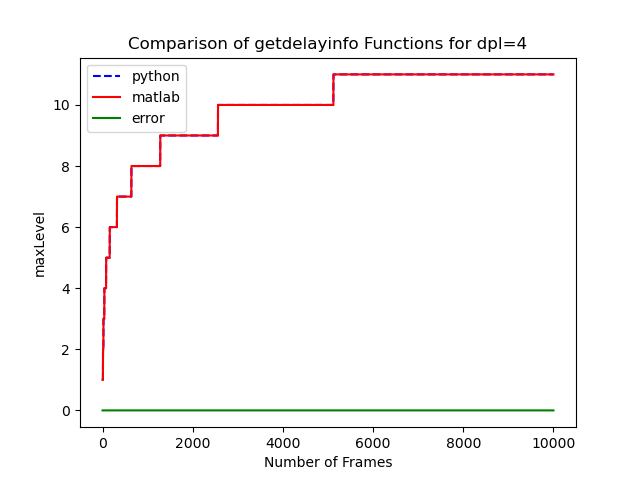

<function matplotlib.pyplot.show(*, block=None)>

In [7]:
numFrames = np.arange(1,10000+1,1)

maxLevels = np.zeros((1,len(numFrames)))

for i in range(len(numFrames)):
    maxLevels[0,i]+=getdelayinfo(numFrames[i],4)[1]
    
maxLevelsMat = np.array(scipy.io.loadmat('maxLevels_1_to_10000.mat')['maxLevels'])


import matplotlib.pyplot as plt
%matplotlib notebook

fig,ax = plt.subplots()
ax.plot(numFrames,maxLevels[0,:],'b--')
ax.plot(numFrames,maxLevelsMat[0,:],'r')
ax.plot(numFrames,maxLevels[0,:]-maxLevelsMat[0,:],'g')
ax.legend(('python','matlab','error'))
ax.set_ylabel('maxLevel')
ax.set_xlabel('Number of Frames')
ax.set_title('Comparison of getdelayinfo Functions for dpl=4')
plt.show

In [8]:
F = open('test_speckle.npy','rb')
IMG = np.load(F)
MASK = np.zeros((IMG.shape[1:]))


roi_size = 50
MASK[0:roi_size,0:roi_size] = 1

In [9]:
sumI,G2,_,_,_ = g2calc(IMG,MASK)

G2 = np.mean(G2,axis=(1,2))

In [10]:
G2Mat = np.array(scipy.io.loadmat('G2_matlab.mat')['G2'])
G2Mat = np.mean(G2Mat,axis=(1,2))


In [11]:
framespacing = 1 # second
nframes = IMG.shape[0]
dpl = 4
delay = framespacing * finddelays(nframes,dpl,1)

<IPython.core.display.Javascript object>


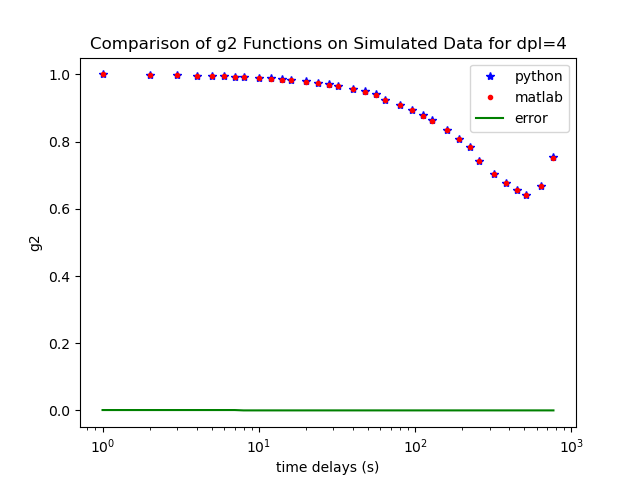

<function matplotlib.pyplot.show(*, block=None)>

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig,ax = plt.subplots()


notzero = 1*10**(-12)
ax.semilogx(delay[0,:],G2[:-1]/np.max(G2[:-1]),'b*')
ax.semilogx(delay[0,:],G2Mat[:-1]/np.max(G2Mat[:-1]),'r.')
ax.semilogx(delay[0,:],np.abs(G2[:-1]-G2Mat[:-1])/G2[:-1],'g')

ax.legend(('python','matlab','error'))
ax.set_ylabel('g2')
ax.set_xlabel('time delays (s)')
ax.set_title('Comparison of g2 Functions on Simulated Data for dpl=4')

plt.show

In [11]:
C = twotime(IMG[:,0:50,0:50])

<IPython.core.display.Javascript object>


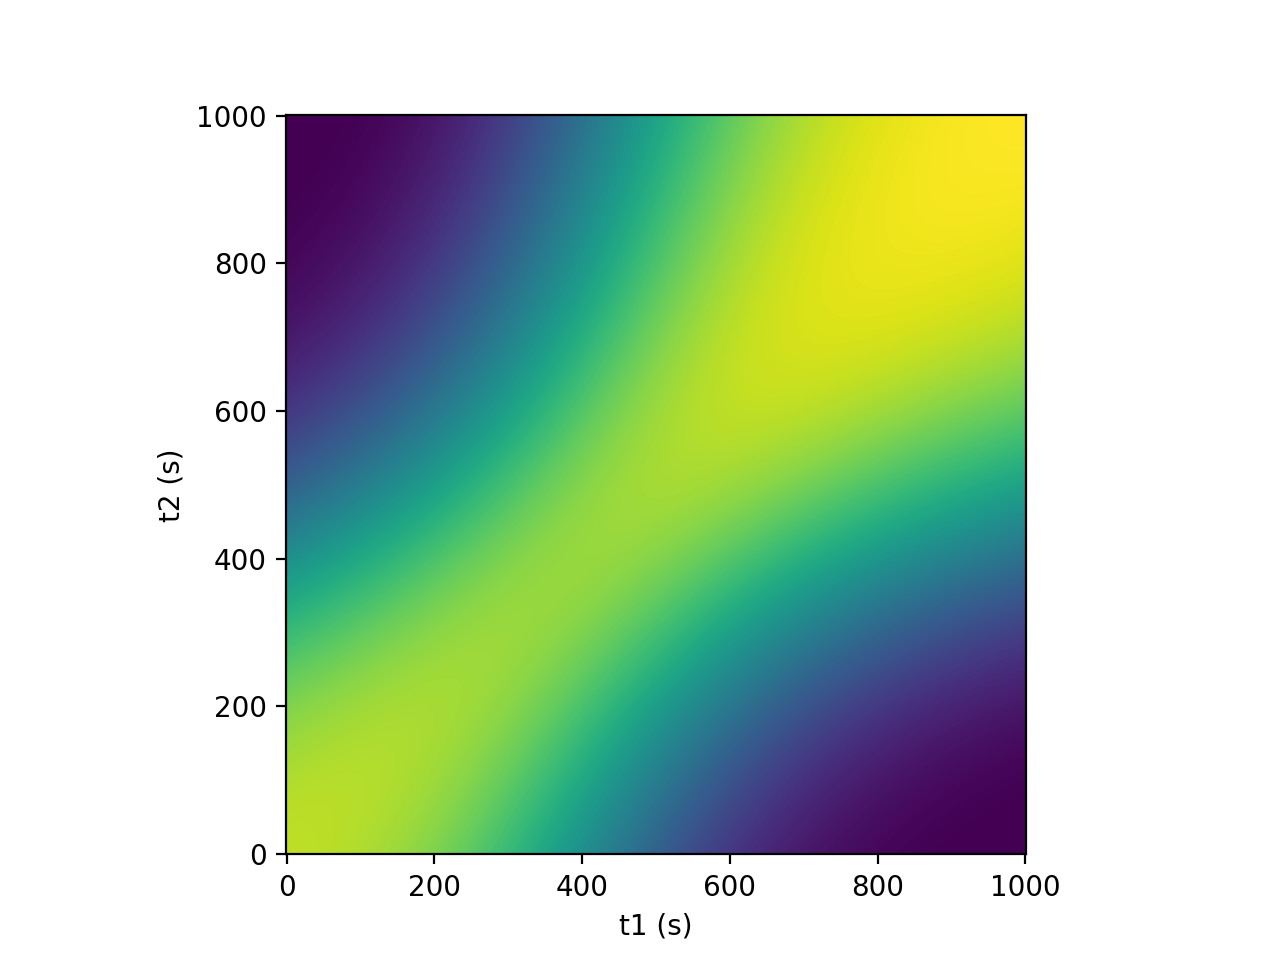

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure
plt.ylabel('t2 (s)')
plt.xlabel('t1 (s)')
plt.imshow(C,origin="lower")